In [ ]:
import pandas as pd
import numpy as np
import random as rnd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
#設定繪圖桌布大小
plt.rcParams['figure.figsize']=(10.0,8.5)

In [ ]:
#讀取檔案，將檔案名稱設為data
from google.colab import files
data=pd.read_excel('2019STA.xlsx')

In [ ]:
data.head()

,DATASET,R/P,DATE,TEAMS,H/R,W/E,W/L,DIFF,1Q,2Q,3Q,4Q,F,MIN,FG,FGA,3P,3PA,FT,FTA,OR,ORR,DRR,FT%,TOV%,EFG%,DRB%,ORB%,DR,TOT,A,PF,ST,TO,BL,PTS,POSS,PACE,OEFF,DEFF,REST DAYS,OPENING ODDS,SPREAD
0,2016-2017 Regular Season,1,10/25/2016,New York,2,1,0,-29,18,27,19,24,88,240,32,87,9,27,15,20,13,11,40,0.172414,0.158172,0.419540,0.725000,0.245283,29,42,17,22,6,18,6,88,100.4,100.4,87.7,116.6,3,205.5,9.5
1,2016-2017 Regular Season,1,10/25/2016,Cleveland,1,1,1,29,28,20,34,35,117,240,45,94,13,35,14,19,11,13,29,0.148936,0.120316,0.547872,0.754717,0.275000,40,51,31,22,12,14,5,117,100.4,100.4,116.6,87.7,3,-9.5,-9.5
2,2016-2017 Regular Season,1,10/25/2016,Utah,2,2,0,-9,26,20,37,21,104,240,40,82,8,24,16,16,6,5,29,0.195122,0.109956,0.536585,0.833333,0.171429,25,31,19,19,9,11,5,104,92.5,92.5,112.4,122.1,3,194.0,6.0
3,2016-2017 Regular Season,1,10/25/2016,Portland,1,2,1,9,26,28,23,36,113,240,39,75,13,19,22,22,5,6,25,0.293333,0.124121,0.606667,0.828571,0.166667,29,34,22,18,5,12,3,113,92.5,92.5,122.1,112.4,3,-6.0,-6.0
4,2016-2017 Regular Season,1,10/25/2016,San Antonio,2,2,1,29,31,33,33,32,129,240,47,98,12,24,23,26,21,8,27,0.234694,0.106174,0.540816,0.809524,0.437500,34,55,25,19,13,13,3,129,98.8,98.8,130.6,101.2,3,210.5,8.0


# 一、單一變數資料分布圖形：直方圖、長條圖與圓餅圖

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


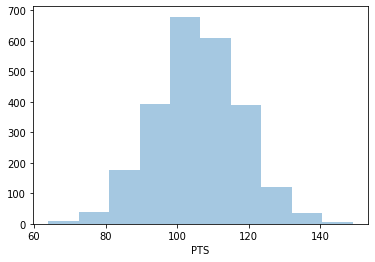

In [ ]:
#用seaborn畫一個直方圖（distplot）、處理遺失值（dropna）、調整級距（bins）distribution, bins=10:區分成10個級距
sns.distplot(data['PTS'].dropna(),bins=10,kde=False)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

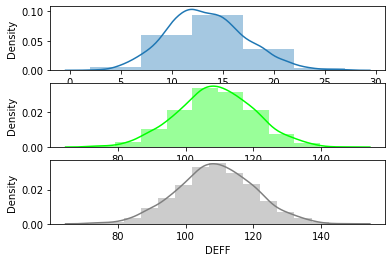

In [ ]:
#一次畫多個直方圖（axes陣列位置); axes=plt.subplots(3):畫出三個圖形; color='lime'為顏色設定
fig, axes=plt.subplots(3)
sns.distplot(data['TO'],ax=axes[0],bins=5)
sns.distplot(data['OEFF'],ax=axes[1],color='lime',bins=10)
sns.distplot(data['DEFF'],ax=axes[2],color='gray',bins=15)

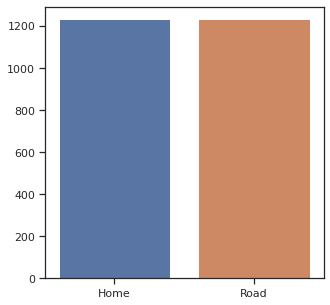

In [ ]:
#利用seaborn畫一個長條圖; style='ticks':設定圖型底色
import seaborn as sns; sns.set(style='ticks')
result=[sum(data['H/R']==1),sum(data['H/R']==2)]
sns.barplot(x=['Home','Road'],y=result)

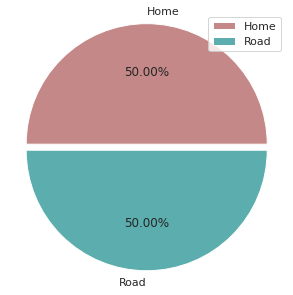

In [ ]:
#畫圓餅圖
plt.rcParams['figure.facecolor']='white'
plt.rcParams['figure.figsize']=(5,5)
fig, axes=plt.subplots()
axes.pie([sum(data['H/R']==1),sum(data['H/R']==2)],labels=['Home','Road'],colors=['#c48888','#5cadad'],autopct='%.2f%%',explode=(0,0.05))
axes.axis('equal')
plt.legend(labels=['Home','Road'])
plt.show()

# Exercise
1.請針對「2019STA.xlsx」檔案中小考與期中考成績，畫出成績的分佈圖(直方圖)

2.請針對「2019STA.xlsx」檔案中性別，畫出性別比例的圓餅圖

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


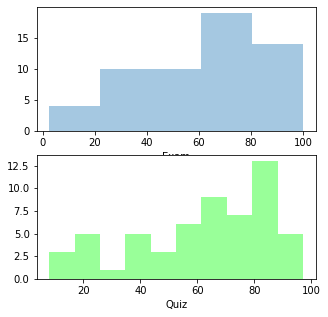

In [ ]:
fig, axes=plt.subplots(2)
sns.distplot(data['Exam'],ax=axes[0],bins=5,kde=False)
sns.distplot(data['Quiz'],ax=axes[1],color='lime',bins=10,kde=False)

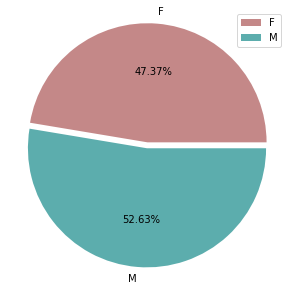

In [ ]:
plt.rcParams['figure.facecolor']='white'
plt.rcParams['figure.figsize']=(5,5)
fig, axes=plt.subplots()
axes.pie([sum(data['Gender']=='F'),sum(data['Gender']=='M')],labels=['F','M'],colors=['#c48888','#5cadad'],autopct='%.2f%%',explode=(0,0.05))
axes.axis('equal')
plt.legend(labels=['F','M'])
plt.show()



# 兩變數關係之圖形：散佈圖與熱圖

In [ ]:
# import函式庫
import seaborn as sns; sns.set(style='ticks',color_codes=True)
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize']=(5,5)

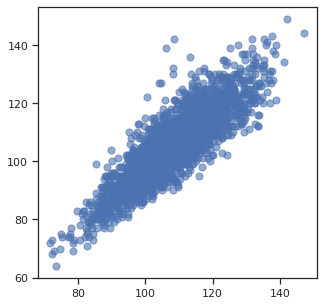

In [ ]:
#用matplot畫圖，用'OEFF'和'PTS'畫個scatter plot、透明度、調整顏色（做顏色陣列）
# colorlist=['red','pink','yellow','orange','skyblue']
plt.scatter(x=data.OEFF,y=data.PTS,color='b',s=50,alpha=0.6)

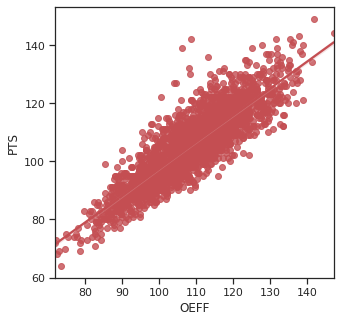

In [ ]:
#用seaborn畫一個regplot、把迴歸線拿掉
sns.regplot(x=data.OEFF,y=data.PTS,color='r',fit_reg=True)

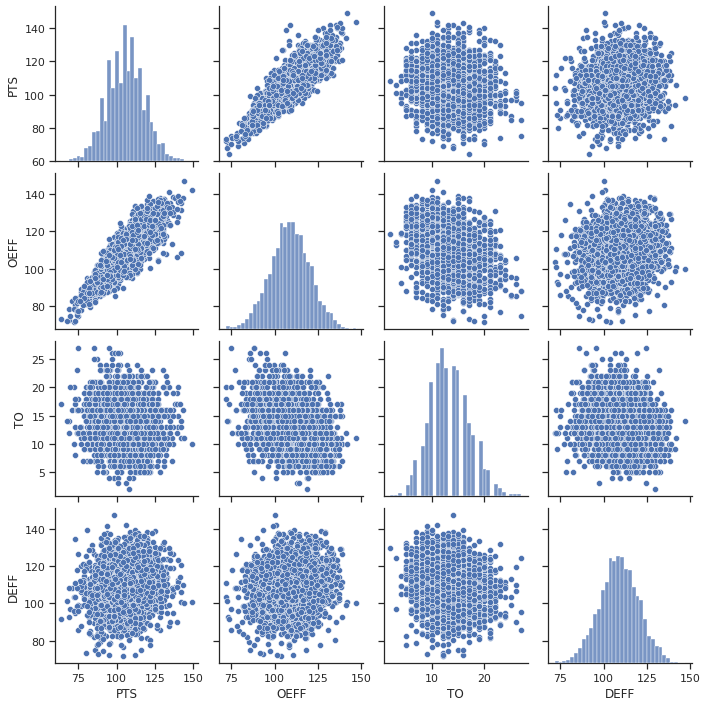

In [ ]:
#用seaborn畫出pairplot (配對圖)
import seaborn as sns; sns.set(style='ticks')
pairlist=['PTS','OEFF','TO','DEFF']
sns.pairplot(data[pairlist])

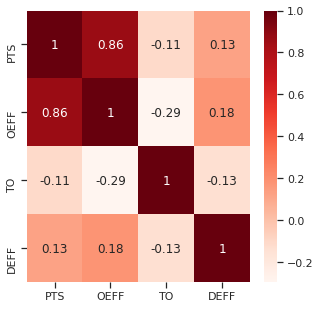

In [ ]:
#算相關係數、畫熱點圖(heatmap)、顯示相關係數值（annot）
pairlist=['PTS','OEFF','TO','DEFF']
sns.heatmap(data[pairlist].corr(),annot=True,cmap='Reds')

# Exercise
 1.請針對「2019STA.xlsx」檔案中小考與期中考成績，畫出小考與期中考成績相關性之配對圖。
 
 2.請針對「2019STA.xlsx」檔案中小考與期中考成績，畫出小考與期中考成績相關性之熱圖。

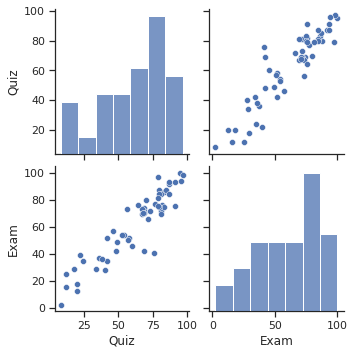

In [ ]:
import seaborn as sns; sns.set(style='ticks')
pairlist=['Quiz','Exam']
sns.pairplot(data[pairlist])

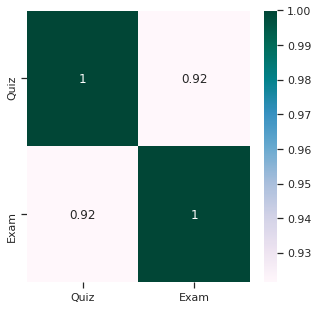

In [ ]:
pairlist=['Quiz','Exam']
sns.heatmap(data[pairlist].corr(),annot=True,cmap='PuBuGn')

# 作業二：請針對所提供的資料檔案(boston_house(type),xlsx)進行以下分析：
1. 請畫出此資料中房價的直方圖。
2. 請畫出此資料中房價超過20(PRICE TYPE=2)與低於20(PRICE TYPE=0)的個數的長條圖。
3. 請畫出此資料中RAD各類別個數的圓餅圖。
4. 請畫出此資料中量化指標相關性的配對圖。
5. 請畫出此資料中量化指標相關性的熱圖。
請說明上述視覺化圖形分析結果

備註：資料取自於Kaggle平台